In [1]:
import numpy as np
import pandas as pd

# For visualizations
import seaborn as sns 
sns.set_style('whitegrid')

# To plot the graphs
import matplotlib as mpl 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Initial visualization inspired by previous data analysis done by Rihad Variawa

/kaggle/input/international-energy-statistics/Energy-Questionnaire-Guidelines.pdf
/kaggle/input/international-energy-statistics/all_energy_statistics.csv


In [2]:
# Read data into dataframe
df = pd.read_csv("/kaggle/input/international-energy-statistics/all_energy_statistics.csv")

In [3]:
# Inspect data
df.info()
# print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [4]:
# Drop unused variable (footnotes)
df.drop("quantity_footnotes", axis=1, inplace=True)

In [5]:
# Create country lists
non_EU = ["US", "BR", "CAN", "CHI", "IND", "JAP", "UK"]
EU = ["SP", "ITA", "GER", "FR", "NETH"]
country_dict = {"US": "United States", "BR": "Brazil", "CAN": "Canada", "CHI": "China", "IND": "India", "JAP": "Japan", "UK": "United Kingdom","SP": "Spain", "ITA": "Italy", "GER": "Germany", "FR": "France", "NETH": "Netherlands"}

In [6]:
# Make DataFrame for Countries of Interest
byCountry = {}
for country in non_EU:
    byCountry[country] = df[df.country_or_area.isin([country_dict[country]])].sort_values("year")
for country in EU:
    byCountry[country] = df[df.country_or_area.isin([country_dict[country]])].sort_values("year")

In [7]:
# Get electricity totals for Germany in 2014
#GER_2014_totals = GER_2014[GER_2014.category=="total_electricity"]
#GER_2014_totals.info()
#GER_2014_totals.to_excel('GER_2014_totals.xlsx')

In [8]:
# Dataframes by energy type, by country

# Wind DataFrames
Wind = {}
for country in non_EU:
    Wind[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total wind production"].sort_values("year") 
for country in EU:
    Wind[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total wind production"].sort_values("year") 

# Solar DataFrames
Solar = {}
for country in non_EU:
    Solar[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total solar production"].sort_values("year") 
for country in EU:
    Solar[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total solar production"].sort_values("year") 

# Hydro DataFrames
Hydro = {}
for country in non_EU:
    Hydro[country] = byCountry[country][byCountry[country].commodity_transaction == "Hydro – Main activity"].sort_values("year") 
for country in EU:
    Hydro[country] = byCountry[country][byCountry[country].commodity_transaction == "Hydro – Main activity"].sort_values("year") 

# Nuclear DataFrames
Nuclear = {}
for country in non_EU:
    Nuclear[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total nuclear production"].sort_values("year") 
for country in EU:
    Nuclear[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total nuclear production"].sort_values("year") 

# Total Electricity Production DataFrames
totalProduction = {}
for country in non_EU:
    totalProduction[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total production, main activity"].sort_values("year") 
for country in EU:
    totalProduction[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total production, main activity"].sort_values("year") 

# Total Electricity Consumption DataFrames
totalConsumption = {}
for country in non_EU:
    totalConsumption[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - Final energy consumption"].sort_values("year") 
for country in EU:
    totalConsumption[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - Final energy consumption"].sort_values("year") 



In [9]:
# Merge DataFrames into "Renewable"

Renewable = {}

# Merge totalProduction and totalConsumption
for country in non_EU:
    Renewable[country] = pd.merge(totalProduction[country], totalConsumption[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_totalProduction', '_totalConsumption'))
    #Renewable[country].rename(columns = {'quantity':'quantity_totalConsumption'}, inplace=True)
    Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(totalProduction[country], totalConsumption[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_totalProduction', '_totalConsumption'))
    #Renewable[country].rename(columns = {'quantity':'quantity_totalConsumption'}, inplace=True)
    Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)

# Merge Totals with Wind
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Wind[country][["year", "quantity"]], how="outer", on=["year"])
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Wind[country][["year", "quantity"]], how="outer", on=["year"])
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
    
# Merge Totals with Wind and Solar
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Solar[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_wind', '_solar'))
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Solar[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_wind', '_solar'))
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)

# Merge Totals with Wind and Solar and Nuclear
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Nuclear[country][["year", "quantity"]], how="outer", on=["year"])
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Nuclear[country][["year", "quantity"]], how="outer", on=["year"])

# Merge Totals with Wind and Solar and Nuclear and Hydro
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Hydro[country][["year", "quantity"]], how="outer", on=["year"], suffixes=("_nuclear", "_hydro"))
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Hydro[country][["year", "quantity"]], how="outer", on=["year"], suffixes=("_nuclear", "_hydro"))

Renewable["GER"].tail()


,country_or_area,year,unit,quantity_totalProduction,quantity_totalConsumption,quantity_wind,quantity_solar,quantity_nuclear,quantity_hydro
19,Germany,2010,"Kilowatt-hours, million",580009.0,532424.0,37793.0,11729.0,140556.0,26975.0
20,Germany,2011,"Kilowatt-hours, million",562454.0,525546.0,48883.0,19599.0,107971.0,23184.0
21,Germany,2012,"Kilowatt-hours, million",585718.0,525834.0,50670.0,26380.0,99460.0,27499.0
22,Germany,2013,"Kilowatt-hours, million",593837.0,523201.0,51708.0,31010.0,97290.0,28600.0
23,Germany,2014,"Kilowatt-hours, million",582345.0,512835.0,57357.0,36056.0,97129.0,25282.0


In [10]:
# Make Master Dataframe

# Make dataframe to append to
Master = Renewable["GER"]
# Clear dataframe (Germany values will be appended again soon)
Master = Master.iloc[0:0]

# Append all relevant countries
for country in non_EU:
    Master = Master.append(Renewable[country], ignore_index=True)
for country in EU:
    Master = Master.append(Renewable[country], ignore_index=True)

#Master.to_excel('Selected_Countries.xlsx')
Master.tail()
    

,country_or_area,year,unit,quantity_totalProduction,quantity_totalConsumption,quantity_wind,quantity_solar,quantity_nuclear,quantity_hydro
294,Netherlands,2010,"Kilowatt-hours, million",95187.0,108000.0,3994.0,56.0,3969.0,105.0
295,Netherlands,2011,"Kilowatt-hours, million",89215.0,108148.0,5101.0,104.0,4141.0,57.0
296,Netherlands,2012,"Kilowatt-hours, million",78150.0,104006.0,4981.0,226.0,3915.0,104.0
297,Netherlands,2013,"Kilowatt-hours, million",77128.0,104373.0,5627.0,487.0,2891.0,114.0
298,Netherlands,2014,"Kilowatt-hours, million",81458.0,101630.0,5797.0,785.0,4091.0,112.0


> **Public Opinion Variables**

In [11]:
# Approval of Wind Energy by country in %
# For Europe: https://en.wikipedia.org/wiki/Wind_power_in_the_European_Union#Public_opinion
# For US: https://mthink.com/public-attitudes-wind-energy/
Wind_approv = {"UK": 0.72, "FR": 0.73, "ITA": 0.81, "SP": 0.93, "GER": 0.76, "US": 0.91}

# Approval for Solar in %
# ESS8_pawcer_climate_change.pdf
# http://www.green-peninsula.com/opportunities/reputation/ (world average used for US)
Solar_approv = {"UK": 0.76, "FR": 0.83, "ITA": 0.89, "SP": 0.94, "GER": 0.87, "US": 0.97}

# Approval for Nuclear in %
# ESS8_pawcer_climate_change.pdf
# Alternative for Europe: https://www.mdpi.com/2071-1050/10/5/1518 (review)
Nuclear_approv = {"UK": 0.17, "FR": 0.16, "ITA": 0.12, "SP": 0.09, "GER": 0.03, "US": 0.38}

# Approval for Hydro in %
# TODO
Hydro_approv = {"UK": 0.75, "FR": 0.74, "ITA": 0.70, "SP": 0.78, "GER": 0.72, "US": 0.91}

In [12]:
# Approval ratings for Germany
Approval = {}
for country_id in Wind_approv.keys():
    Approval[country_id] = [Wind_approv[country_id], Solar_approv[country_id], Nuclear_approv[country_id], Hydro_approv[country_id]]

app = pd.DataFrame.from_dict(Approval) 
app = pd.DataFrame.transpose(app) 
print(app)


        0     1     2     3
UK   0.72  0.76  0.17  0.75
FR   0.73  0.83  0.16  0.74
ITA  0.81  0.89  0.12  0.70
SP   0.93  0.94  0.09  0.78
GER  0.76  0.87  0.03  0.72
US   0.91  0.97  0.38  0.91


**Linear Programming Application**

In [13]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 132 kB/s  eta 0:00:01   |████                            | 5.0 MB 5.0 MB/s eta 0:00:08
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


The code below runs without applying constraints. It siumply returns the minimum energy mix allowed by the "percentage" departure variable. Run the code below to get the lower bounds for constraints (Cost, Reliability, Approval).

In [14]:
import pulp
# Step 1 - PROMPT USER INPUT HERE:
# Please choose a country:
country = "Germany"
year = 2014

# Deviation range. Choose how much % the new values may depart from last year's values:
percentage = 10 # choose departure level here

#################
# RUN THE CODE BELOW WITHOUT FURTHER CHANGES, BUT DO KEEP TRACK OF THE VALUES RETURNED AT THE BOTTOM (SEE OUTPUT)
#################

# Step 2 - LOAD VALUES AND CREATE NECESSARY VARIABLES:
# Convert percentage into multiplier
depart = percentage / 100 # multiplier

# Declare "energy menu" list and relevant information
# For relaitve cost data: https://en.wikipedia.org/wiki/Cost_of_electricity_by_source
menu_list = ["wind", "solar", "nuclear", "hydro"]

# Get country data
country_dict_inv = dict(map(reversed, country_dict.items()))
country_id = country_dict_inv[country]

# Get approval ratings
approval = Approval[country_id]

# Get energy quantities
total = int(totalProduction[country_id][totalProduction[country_id].year == 2014]["quantity"].values)

wind = Wind[country_id][Wind[country_id].year == 2014]["quantity"].values
solar = Solar[country_id][Solar[country_id].year == 2014]["quantity"].values
nuclear = Nuclear[country_id][Nuclear[country_id].year == 2014]["quantity"].values
hydro = Hydro[country_id][Hydro[country_id].year == 2014]["quantity"].values

# Create energy source dict for future recall
quantity_dict = {"wind": wind, "solar": solar, "nuclear": nuclear, "hydro": hydro}
print("Current energy consumption:")
print()

# Calculate upper and lower bounds based on % of departure variable inputted above
lower = {}
upper = {}
for item in quantity_dict:
    val = int(quantity_dict[item])
    lower[item] = val - (depart*val)
    upper[item] = val + (depart*val)

print(f"Bounds (+/- {percentage}% of last year)")
print("Lower :", lower)
print("Upper :", upper)
print()

# Calculate percentages for each energy source
energy = [wind/total, solar/total, nuclear/total, hydro/total]
renewables = 0
energy2 = []

for source in energy:
    renewables += source
    energy2.append(source)


# Step 3 - PULP PROBLEM STATEMENT STARTS HERE:
# Declare problem and whether the objective function is to maximize or minimize
problem = pulp.LpProblem(name="Cost",sense=pulp.LpMinimize)

# Declare energy menu list and relevant information
# For relaitve cost data: https://en.wikipedia.org/wiki/Cost_of_electricity_by_source
# For reliability https://www.energy.gov/ne/articles/nuclear-power-most-reliable-energy-source-and-its-not-even-close
menu_list = ["wind", "solar", "nuclear", "hydro"]
cost = [46, 51, 164, 100] # Relative cost energy unit produced (MWh)
reliability = [0.34, 0.24, 0.93, 0.39] # Capacity factor
approval # Percentage of public approval loaded in Step X

print("Ratings:")
print("Approval", approval)
print("Reliability:", approval)
print()

# Declare constraints. Infrom your choices based on lower bound values outputted in the solution in the section above
energy_requirement_dict ={
    "Cost": "Minimized", 
    "Reliability" : None,
    "Approval" : None
}

# Declare LpVariables for each item  
LpVariableList = [pulp.LpVariable('{}'.format(item), cat='Integer', lowBound=lower[item], upBound=upper[item]) for item in menu_list]

# Declare objective: to minimize cost
problem += pulp.lpDot(cost, LpVariableList)

# Declare constraints
#problem += pulp.lpDot(cost, LpVariableList) <= energy_requirement_dict["Cost"]
#problem += pulp.lpDot(reliability, LpVariableList) >= energy_requirement_dict["Reliability"]
#problem += pulp.lpDot(approval, LpVariableList) >= energy_requirement_dict["Approval"]


# Solve
status = problem.solve()
print(pulp.LpStatus[status])

# Result
print("Result")
for menu_item in LpVariableList:
  print(str(menu_item) + " × "+ str(int(menu_item.value())))
print()

print("USE VALUES BELOW AS BENCHMARK REFERENCES FOR THE NEXT SECTION:")
print()

for energy_source, value in {"Cost": cost, 
                             "Reliability": reliability,
                             "Approval": approval}.items():
        print("*{}: {} Reference: {}".format(energy_source, str(round(pulp.lpDot(value, LpVariableList).value())), energy_requirement_dict[energy_source]))

Current energy consumption:

Bounds (+/- 10% of last year)
Lower : {'wind': 51621.3, 'solar': 32450.4, 'nuclear': 87416.1, 'hydro': 22753.8}
Upper : {'wind': 63092.7, 'solar': 39661.6, 'nuclear': 106841.9, 'hydro': 27810.2}

Ratings:
Approval [0.76, 0.87, 0.03, 0.72]
Reliability: [0.76, 0.87, 0.03, 0.72]

Optimal
Result
wind × 51622
solar × 32451
nuclear × 87417
hydro × 22754

USE VALUES BELOW AS BENCHMARK REFERENCES FOR THE NEXT SECTION:

*Cost: 20641401 Reference: Minimized
*Reliability: 115512 Reference: None
*Approval: 86470 Reference: None


**The code below runs with active contraints. Use values from previous output to start tweaking contraints to get different results**

In [15]:
# Step 1 - PROMPT USER INPUT HERE:
# Please choose a country:
country = "Germany"
year = 2014

# Deviation range. Choose how much % the new values may depart from last year's values:
percentage = 10 # choose departure level here


# Step 2 - LOAD VALUES AND CREATE NECESSARY VARIABLES:
# Convert percentage into multiplier
depart = percentage / 100 # multiplier

# Declare "energy menu" list and relevant information
# For relaitve cost data: https://en.wikipedia.org/wiki/Cost_of_electricity_by_source
menu_list = ["wind", "solar", "nuclear", "hydro"]

# Get country data
country_dict_inv = dict(map(reversed, country_dict.items()))
country_id = country_dict_inv[country]

# Get approval ratings
approval = Approval[country_id]

# Get energy quantities
total = int(totalProduction[country_id][totalProduction[country_id].year == 2014]["quantity"].values)

wind = Wind[country_id][Wind[country_id].year == 2014]["quantity"].values
solar = Solar[country_id][Solar[country_id].year == 2014]["quantity"].values
nuclear = Nuclear[country_id][Nuclear[country_id].year == 2014]["quantity"].values
hydro = Hydro[country_id][Hydro[country_id].year == 2014]["quantity"].values

# Create energy source dict for future recall
quantity_dict = {"wind": wind, "solar": solar, "nuclear": nuclear, "hydro": hydro}
print("Current energy consumption:")
print()

# Calculate upper and lower bounds based on % of departure variable inputted above
lower = {}
upper = {}
for item in quantity_dict:
    val = int(quantity_dict[item])
    lower[item] = val - (depart*val)
    upper[item] = val + (depart*val)

print(f"Bounds (+/- {percentage}% of last year)")
print("Lower :", lower)
print("Upper :", upper)
print()

# Calculate percentages for each energy source
energy = [wind/total, solar/total, nuclear/total, hydro/total]
renewables = 0

for source in energy:
    renewables += source
    energy2.append(source)


# Step 3 - PULP PROBLEM STATEMENT STARTS HERE:
# Declare problem and whether the objective function is to maximize or minimize
problem = pulp.LpProblem(name="Cost",sense=pulp.LpMinimize)

# Declare energy menu list and relevant information
# For relaitve cost data: https://en.wikipedia.org/wiki/Cost_of_electricity_by_source
# For reliability https://www.energy.gov/ne/articles/nuclear-power-most-reliable-energy-source-and-its-not-even-close
menu_list = ["wind", "solar", "nuclear", "hydro"]
cost = [46, 51, 164, 100] # Relative cost energy unit produced (MWh)
reliability = [0.34, 0.24, 0.93, 0.39] # Capacity factor
approval # Percentage of public approval loaded in Step X

print("Ratings:")
print("Approval", approval)
print("Reliability:", approval)
print()

# Declare constraints. Infrom your choices based on lower bound values outputted in the solution in the section above
energy_requirement_dict ={
    "Cost": "Minimized", 
    "Reliability" : 115512,
    "Approval" : 100000
}

# Declare LpVariables for each item  
LpVariableList = [pulp.LpVariable('{}'.format(item), cat='Integer', lowBound=lower[item], upBound=upper[item]) for item in menu_list]

# Declare objective: to minimize cost
problem += pulp.lpDot(cost, LpVariableList)

# Declare constraints
#problem += pulp.lpDot(cost, LpVariableList) <= energy_requirement_dict["Cost"]
problem += pulp.lpDot(reliability, LpVariableList) >= energy_requirement_dict["Reliability"]
problem += pulp.lpDot(approval, LpVariableList) >= energy_requirement_dict["Approval"]

# Solve
status = problem.solve()
print(pulp.LpStatus[status])

# Result
print("Result")
for menu_item in LpVariableList:
  print(str(menu_item) + " × "+ str(int(menu_item.value())) )
print()

for energy_source, value in {"Cost": cost, 
                             "Reliability": reliability,
                             "Approval": approval}.items():
		print("*{}: {} Reference: {}".format(energy_source, str(round(pulp.lpDot(value, LpVariableList).value())), energy_requirement_dict[energy_source]))


Current energy consumption:

Bounds (+/- 10% of last year)
Lower : {'wind': 51621.3, 'solar': 32450.4, 'nuclear': 87416.1, 'hydro': 22753.8}
Upper : {'wind': 63092.7, 'solar': 39661.6, 'nuclear': 106841.9, 'hydro': 27810.2}

Ratings:
Approval [0.76, 0.87, 0.03, 0.72]
Reliability: [0.76, 0.87, 0.03, 0.72]

Optimal
Result
wind × 61174
solar × 39658
nuclear × 87417
hydro × 22754

*Cost: 21448350 Reference: Minimized
*Reliability: 120489 Reference: 115512
*Approval: 100000 Reference: 100000


** This is the end of the relevant code. Next are simply some plots to visualize the data using individual energy dataframes (not Master)**

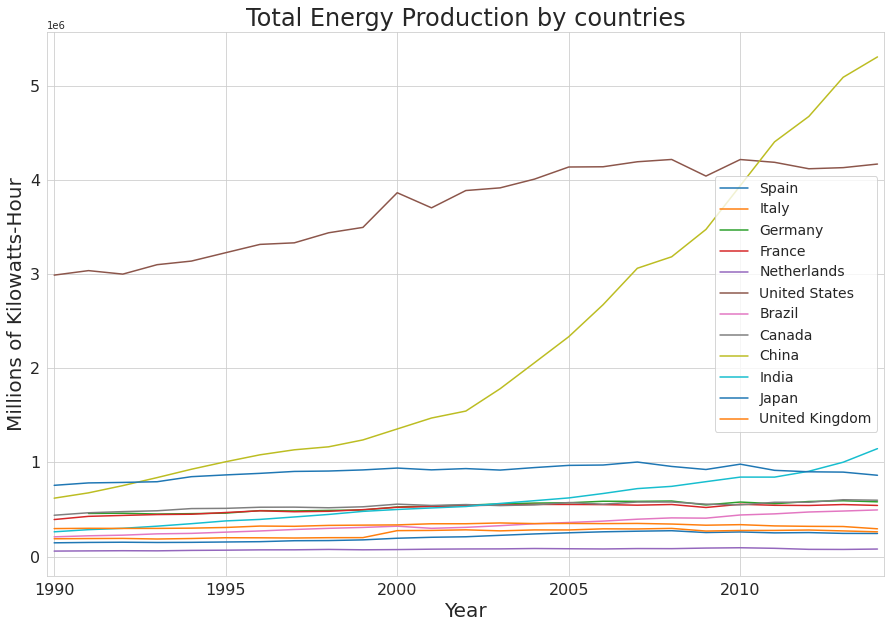

In [16]:
# Get overview Total Energy Production

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Energy Production by countries',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(totalProduction[country]["year"],totalProduction[country]["quantity"],label=country_dict[country]) 
for country in non_EU:
    plt.plot(totalProduction[country]["year"],totalProduction[country]["quantity"],label=country_dict[country])

# Show Plot
plt.legend(fontsize=14)
plt.show()

[57357.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


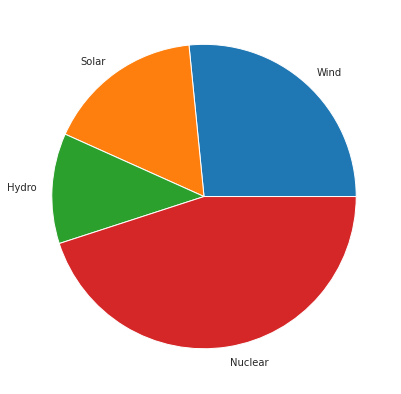

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


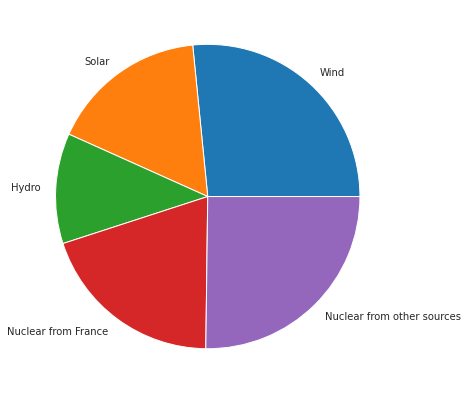

In [17]:
# Practicing pie chart visualization for class

# Creating dataset 
year = 2014
Wind_ger = Wind["GER"][Wind["GER"].year == 2014]["quantity"].values
print(Wind_ger)
Solar_ger = Solar["GER"][Solar["GER"].year == 2014]["quantity"].values
Nuclear_ger = Nuclear["GER"][Nuclear["GER"].year == 2014]["quantity"].values
Hydro_ger = Hydro["GER"][Hydro["GER"].year == 2014]["quantity"].values

Fr_nuclear_import = .44 * Nuclear_ger
other_nuclear = (1 - .44) * Nuclear_ger

types = ["Wind", 'Solar', 
        'Hydro', 'Nuclear'] 
  
data = [Wind_ger, Solar_ger, Hydro_ger, Nuclear_ger]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = types) 
  
# show plot 
plt.show() 

types1 = ["Wind", 'Solar',
        'Hydro', 'Nuclear from France', "Nuclear from other sources"] 
  
data1 = [Wind_ger, Solar_ger, Hydro_ger, Fr_nuclear_import, other_nuclear]

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data1, labels = types1) 
  
# show plot 
plt.show() 


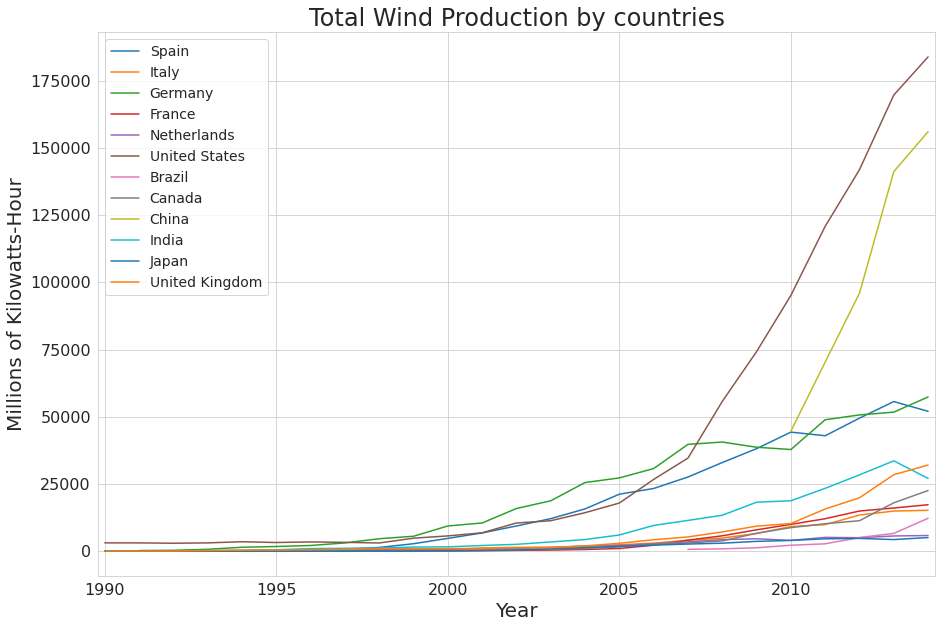

In [18]:
# Get overview of Wind Production in the EU

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production by countries',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country]) 
for country in non_EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country])

# Show Plot
plt.legend(fontsize=14)
plt.show()

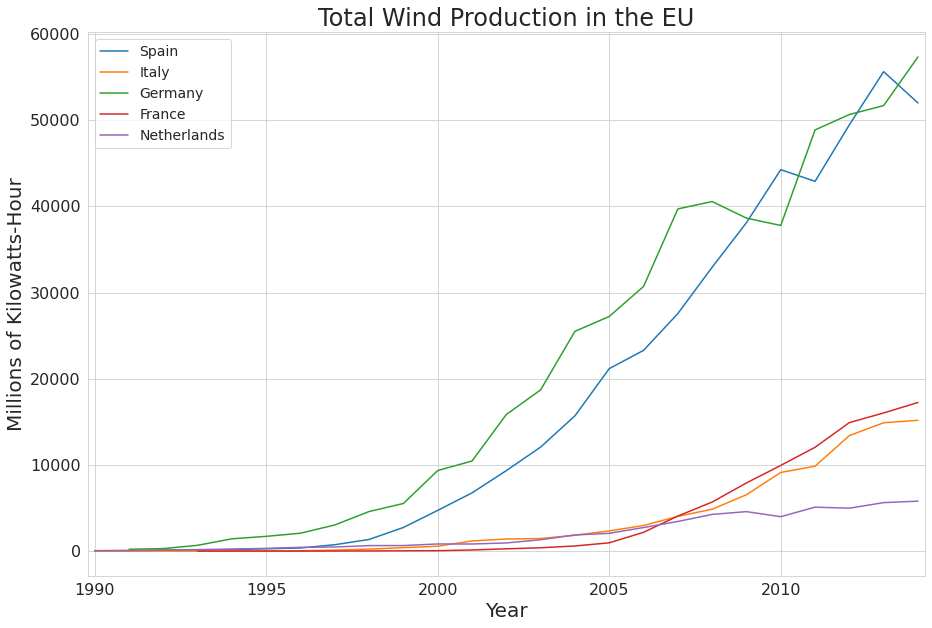

In [19]:
# Get overview of Wind Production in the EU

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production in the EU',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country]) 


# Show Plot
plt.legend(fontsize=14)
plt.show()

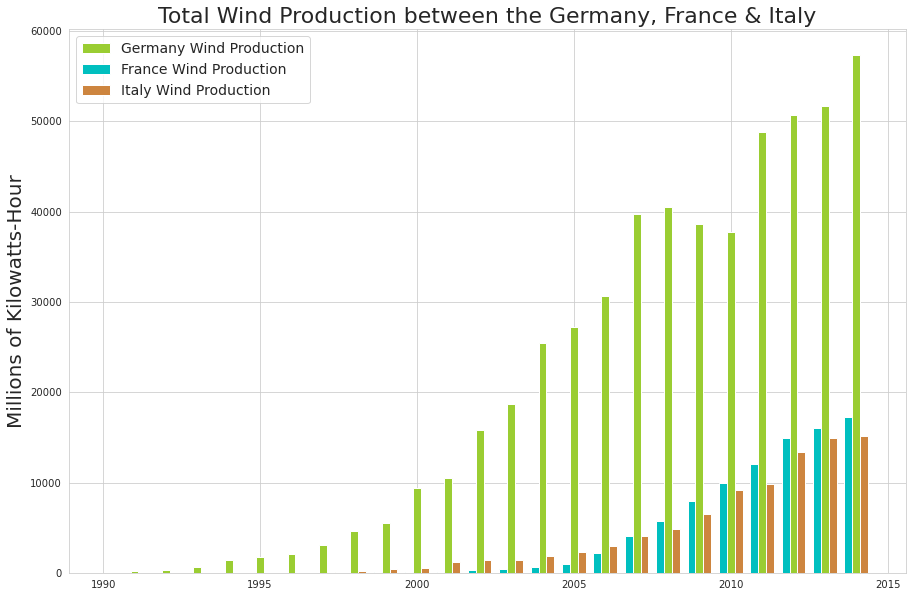

In [20]:
# Wind Energy Production in the EU

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width, color='yellowgreen') 
rects2 = ax.bar(Wind["FR"]["year"] + width -.5, Wind["FR"]["quantity"], width, color='c') 
rects3 = ax.bar(Wind["ITA"]["year"] + width, Wind["ITA"]["quantity"], width, color='peru')

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind Production between the Germany, France & Italy",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('Germany Wind Production', 'France Wind Production', 'Italy Wind Production' ), fontsize=14)

# Show plot
plt.show()

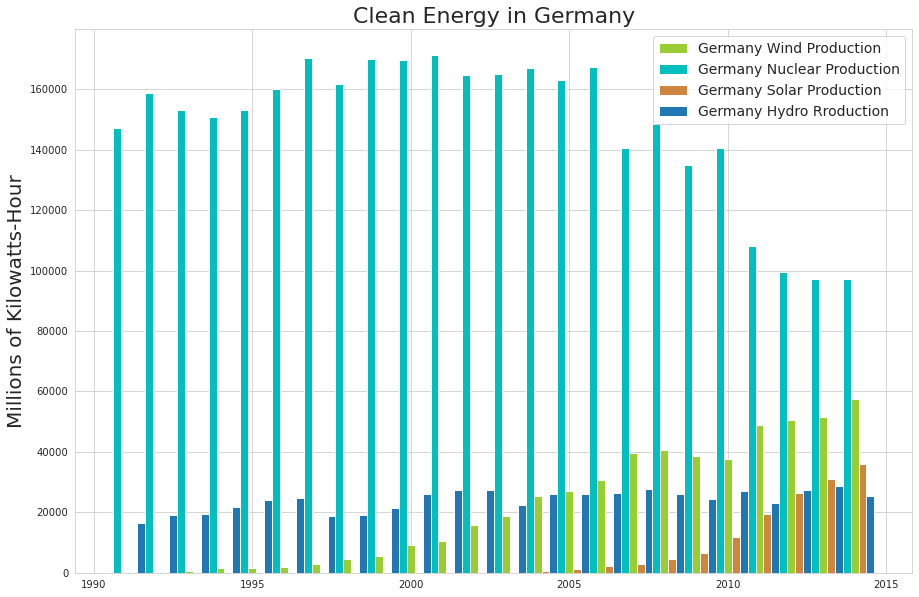

In [21]:
# Clean Energy Production in Germany

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width, color='yellowgreen') 
rects2 = ax.bar(Nuclear["GER"]["year"] + width -.5, Nuclear["GER"]["quantity"], width, color='c') 
rects3 = ax.bar(Solar["GER"]["year"] + width, Solar["GER"]["quantity"], width, color='peru')
rects4 = ax.bar(Hydro["GER"]["year"] + width+.25, Hydro["GER"]["quantity"], width)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Clean Energy in Germany",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
#ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', 'Germany Total Energy'), fontsize=14)
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', "Germany Hydro Rroduction"), fontsize=14)

# Show plot
plt.show()

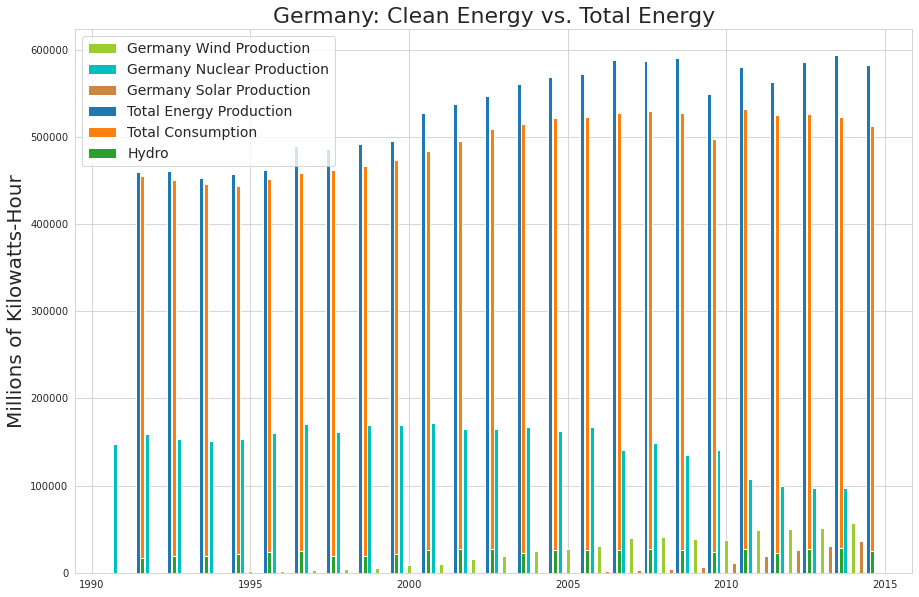

In [22]:
# Clean Energy Production in Germany

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width/2, color='yellowgreen') 
rects2 = ax.bar(Nuclear["GER"]["year"] + width -.5, Nuclear["GER"]["quantity"], width/2, color='c') 
rects3 = ax.bar(Solar["GER"]["year"] + width, Solar["GER"]["quantity"], width/2, color='peru')
rects4 = ax.bar(totalProduction["GER"]["year"] + width +.2, totalProduction["GER"]["quantity"], width/2)
rects5 = ax.bar(totalConsumption["GER"]["year"] + width +.35, totalConsumption["GER"]["quantity"], width/2)
rects6 = ax.bar(Hydro["GER"]["year"] + width +.35, Hydro["GER"]["quantity"], width/2)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Germany: Clean Energy vs. Total Energy",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0], rects5[0], rects6[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', 'Total Energy Production', "Total Consumption", "Hydro"), fontsize=14)

# Show plot
plt.show()